# Linear transformations in Python

In [1]:
# Load libraries
import matplotlib.pyplot as plt
import numpy as np

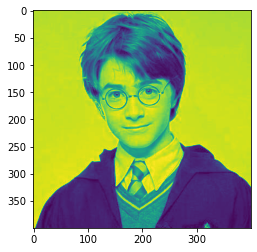

In [2]:
# Load image
image = np.load("data/harry_potter_400x400_array.npy")
plt.imshow(image)

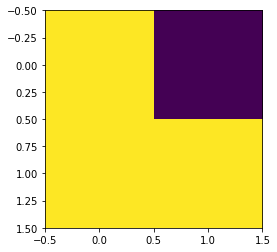

In [11]:
# Create transformation matrix (SPELL!)
trans_matrix = np.array([[1, 0], 
                         [1, 1]])

# Plot transformation matrix
plt.imshow(trans_matrix)

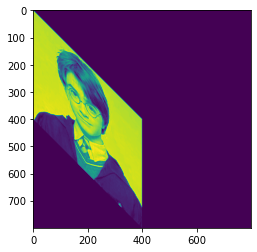

In [12]:
# Create matrix to store tranformed image
size = image.shape
trans_image = np.zeros((800, 800))

# Go pixel by pixel and save results
for x in range(size[0]):
    for y in range(size[1]):
        pixel = image[x][y]
        x_new, y_new = [x, y] @ trans_matrix
        
        if (x_new < trans_image.shape[0]) & (y_new < trans_image.shape[1]):
            trans_image[int(x_new)][int(y_new)] = pixel
        else:
            continue
            
plt.imshow(trans_image)

## Interpolation example

In [13]:
from scipy import interpolate

trans_image[trans_image==0] = np.nan

x = np.arange(0, trans_image.shape[1])
y = np.arange(0, trans_image.shape[0])

#m Mask invalid values
trans_image = np.ma.masked_invalid(trans_image)
xx, yy = np.meshgrid(x, y)

# Get only the valid values
x1 = xx[~trans_image.mask]
y1 = yy[~trans_image.mask]
newarr = trans_image[~trans_image.mask]

trans_image_fix = interpolate.griddata((x1, y1), newarr.ravel(),
                          (xx, yy),
                           method='cubic')

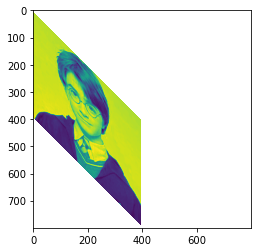

In [14]:
plt.imshow(trans_image_fix)